<a href="https://colab.research.google.com/github/anshul9494/superbowl-analysis/blob/master/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. TV, halftime shows, and the Big Game
<p>After exploring and cleaning our data a little, we're going to answer questions like:</p>
<ul>
<li>What are the most extreme game outcomes?</li>
<li>How does the game affect television viewership?</li>
<li>How have viewership, TV ratings, and ad cost evolved over time?</li>
<li>Who are the most prolific musicians in terms of halftime show performances?</li>



In [0]:
# Import pandas
import pandas as pd

# Load the CSV data into DataFrames
super_bowls = pd.read_csv('datasets/super_bowls.csv')
tv = pd.read_csv('datasets/tv.csv')
halftime_musicians = pd.read_csv('datasets/halftime_musicians.csv')

# Display the first five rows of each DataFrame
display(super_bowls.head(5))
display(tv.tail(5))
display(halftime_musicians.head(5))

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
48,4,CBS,44270000,NaN,39.4,69,NaN,NaN,78200
49,3,NBC,41660000,NaN,36.0,70,NaN,NaN,55000
50,2,CBS,39120000,NaN,36.8,68,NaN,NaN,54500
51,1,CBS,26750000,51180000.0,22.6,43,NaN,NaN,42500
52,1,NBC,24430000,NaN,18.5,36,NaN,NaN,37500


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


## 2. Taking note of dataset issues
<p>For the Super Bowl game data, we can see the dataset appears whole except for missing values in the backup quarterback columns (<code>qb_winner_2</code> and <code>qb_loser_2</code>), which make sense given most starting QBs in the Super Bowl (<code>qb_winner_1</code> and <code>qb_loser_1</code>) play the entire game.</p>
<p>From the visual inspection of TV and halftime musicians data, there is only one missing value displayed, but I've got a hunch there are more. The Super Bowl goes all the way back to 1967, and the more granular columns (e.g. the number of songs for halftime musicians) probably weren't tracked reliably over time. Wikipedia is great but not perfect.</p>
<p>An inspection of the <code>.info()</code> output for <code>tv</code> and <code>halftime_musicians</code> shows us that there are multiple columns with null values.</p>

In [0]:
# Summary of the TV data to inspect
tv.info()
print('\n')
halftime_musicians.info()
# Summary of the halftime musician data to inspect

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
super_bowl          53 non-null int64
network             53 non-null object
avg_us_viewers      53 non-null int64
total_us_viewers    15 non-null float64
rating_household    53 non-null float64
share_household     53 non-null int64
rating_18_49        15 non-null float64
share_18_49         6 non-null float64
ad_cost             53 non-null int64
dtypes: float64(4), int64(4), object(1)
memory usage: 3.8+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
super_bowl    134 non-null int64
musician      134 non-null object
num_songs     88 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ KB


## 3. Combined points distribution
<p>For the TV data, the following columns have missing values and a lot of them:</p>
<ul>
<li><code>total_us_viewers</code> (amount of U.S. viewers who watched at least some part of the broadcast)</li>
<li><code>rating_18_49</code> (average % of U.S. adults 18-49 who live in a household with a TV that were watching for the entire broadcast)</li>
<li><code>share_18_49</code> (average % of U.S. adults 18-49 who live in a household with a TV <em>in use</em> that were watching for the entire broadcast)</li>
</ul>
<p>For the halftime musician data, there are missing numbers of songs performed (<code>num_songs</code>) for about a third of the performances.</p>

<p>Start by looking at combined points for each Super Bowl by visualizing the distribution. Let's also pinpoint the Super Bowls with the highest and lowest scores.</p>

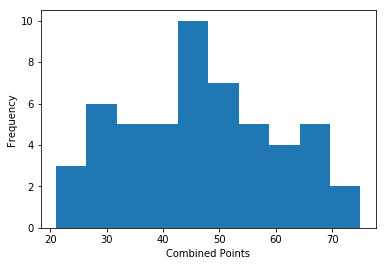

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


In [0]:
# Import matplotlib and set plotting style
from matplotlib import pyplot as plt
%matplotlib inline
# ... YOUR CODE FOR TASK 3 ...

# Plot a histogram of combined points
# ... YOUR CODE FOR TASK 3 ...
plt.xlabel('Combined Points')
plt.ylabel('Number of Super Bowls')
super_bowls['combined_pts'].plot(kind='hist')
plt.show()

# Display the Super Bowls with the highest and lowest combined scores
display(super_bowls[super_bowls['combined_pts'] > 70])
display(super_bowls[super_bowls['combined_pts'] < 25])

## 4. Point difference distribution

<p>Let's take a look at point <em>difference</em> now.</p>

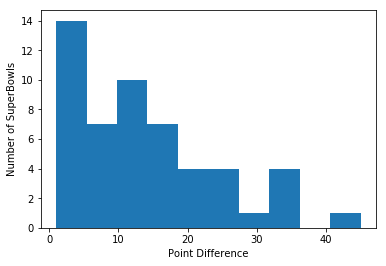

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
5,2013-02-03,47,Mercedes-Benz Superdome,New Orleans,Louisiana,71024,Baltimore Ravens,34,Joe Flacco,NaN,John Harbaugh,San Francisco 49ers,31,Colin Kaepernick,NaN,Jim Harbaugh,65,3
6,2012-02-05,46,Lucas Oil Stadium,Indianapolis,Indiana,68658,New York Giants,21,Eli Manning,NaN,Tom Coughlin,New England Patriots,17,Tom Brady,NaN,Bill Belichick,38,4
9,2009-02-01,43,Raymond James Stadium,Tampa,Florida,70774,Pittsburgh Steelers,27,Ben Roethlisberger,NaN,Mike Tomlin,Arizona Cardinals,23,Kurt Warner,NaN,Ken Whisenhunt,50,4
10,2008-02-03,42,University of Phoenix Stadium,Glendale,Arizona,71101,New York Giants,17,Eli Manning,NaN,Tom Coughlin,New England Patriots,14,Tom Brady,NaN,Bill Belichick,31,3
13,2005-02-06,39,Alltel Stadium,Jacksonville,Florida,78125,New England Patriots,24,Tom Brady,NaN,Bill Belichick,Philadelphia Eagles,21,Donovan McNabb,NaN,Andy Reid,45,3
14,2004-02-01,38,Reliant Stadium,Houston,Texas,71525,New England Patriots,32,Tom Brady,NaN,Bill Belichick,Carolina Panthers,29,Jake Delhomme,NaN,John Fox,61,3
16,2002-02-03,36,Louisiana Superdome,New Orleans,Louisiana,72922,New England Patriots,20,Tom Brady,NaN,Bill Belichick,St. Louis Rams,17,Kurt Warner,NaN,Mike Martz,37,3
27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1
29,1989-01-22,23,Joe Robbie Stadium,Miami Gardens,Florida,75129,San Francisco 49ers,20,Joe Montana,NaN,Bill Walsh,Cincinnati Bengals,16,Boomer Esiason,NaN,Sam Wyche,36,4


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45


In [0]:
# Plot a histogram of point differences
plt.hist(super_bowls.difference_pts)
plt.xlabel('Point Difference')

plt.ylabel('Number of SuperBowls')
plt.show()
# Display the closest game(s) and biggest blowouts
display(super_bowls[super_bowls['difference_pts'] < 5])
display(super_bowls[super_bowls['difference_pts'] > 40])

## 5. Do blowouts translate to lost viewers?
<p>Do large point differences translate to lost viewers? Plot <a href="https://en.wikipedia.org/wiki/Nielsen_ratings">household share</a> <em>(average percentage of U.S. households with a TV in use that were watching for the entire broadcast)</em> vs. point difference to find out.</p>

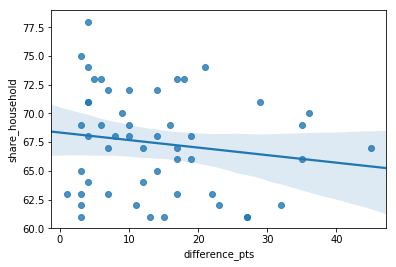

In [0]:
# Join game and TV data, filtering out SB I because it was split over two networks
games_tv = pd.merge(tv[tv['super_bowl'] > 1], super_bowls, on='super_bowl')

# Import seaborn
import seaborn as sns

# Create a scatter plot with a linear regression model fit
sns.regplot(x='difference_pts', y='share_household', data=games_tv)

## 6. Viewership and the ad industry over time
<p>The downward sloping regression line and the 95% confidence interval for that regression <em>suggest</em> that bailing on the game if it is a blowout is common.</p>
<p>How have number of viewers and household ratings trended alongside ad cost? We can find out using line plots that share a "Super Bowl" x-axis.</p>

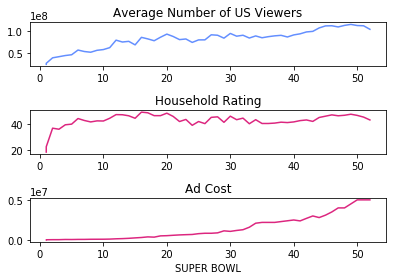

In [0]:
# Create a figure with 3x1 subplot and activate the top subplot
plt.subplot(3, 1, 1)
#tv.plot(subplots=True)
plt.plot(tv['super_bowl'], tv['avg_us_viewers'], color='#648FFF')
plt.title('Average Number of US Viewers')

# Activate the middle subplot
plt.subplot(3, 1, 2)
plt.plot(tv['super_bowl'],tv['rating_household'], color='#DC267F')
plt.title('Household Rating')

# Activate the bottom subplot
plt.subplot(3, 1, 3)
plt.plot(tv['super_bowl'], tv['ad_cost'], color='#DC267F')
plt.title('Ad Cost')
plt.xlabel('SUPER BOWL')

# Improve the spacing between subplots
plt.tight_layout()

## 7. Halftime shows weren't always this great

<p>It turns out Michael Jackson's Super Bowl XXVII performance, one of the most watched events in American TV history, was when the NFL realized the value of Super Bowl airtime and decided they needed to sign big name acts from then on out. The halftime shows before MJ indeed weren't that impressive, which we can see by filtering our <code>halftime_musician</code> data.</p>

In [0]:
# Display all halftime musicians for Super Bowls up to and including Super Bowl XXVII
halftime_musicians[halftime_musicians['super_bowl'] <= 27]

,super_bowl,musician,num_songs
80,27,Michael Jackson,5.0
81,26,Gloria Estefan,2.0
82,26,University of Minnesota Marching Band,NaN
83,25,New Kids on the Block,2.0
84,24,Pete Fountain,1.0
85,24,Doug Kershaw,1.0
86,24,Irma Thomas,1.0
87,24,Pride of Nicholls Marching Band,NaN
88,24,The Human Jukebox,NaN
89,24,Pride of Acadiana,NaN


## 8. Who has the most halftime show appearances?
<p>Lots of marching bands. American jazz clarinetist Pete Fountain. Miss Texas 1973 playing a violin. Nothing against those performers, they're just simply not <a href="https://www.youtube.com/watch?v=suIg9kTGBVI">Beyoncé</a>. To be fair, no one is.</p>
<p>Let's see all of the musicians that have done more than one halftime show, including their performance counts.</p>

In [0]:
# Count halftime show appearances for each musician and sort them from most to least
halftime_appearances = halftime_musicians.groupby('musician').count()['super_bowl'].reset_index()
halftime_appearances = halftime_appearances.sort_values('super_bowl', ascending=False)

# Display musicians with more than one halftime show appearance
halftime_appearances[halftime_appearances['super_bowl'] > 1]

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
104,Up with People,4
1,Al Hirt,4
83,The Human Jukebox,3
76,Spirit of Troy,2
25,Florida A&M University Marching 100 Band,2
26,Gloria Estefan,2
102,University of Minnesota Marching Band,2
10,Bruno Mars,2
64,Pete Fountain,2


## 9. Who performed the most songs in a halftime show?

<p>Filter out marching bands by filtering out musicians with the word "Marching" in them and the word "Spirit" (a common naming convention for marching bands is "Spirit of [something]"). Then we'll filter for Super Bowls after Super Bowl XX to address the missing data issue, <em>then</em> let's see who has the most number of songs.</p>

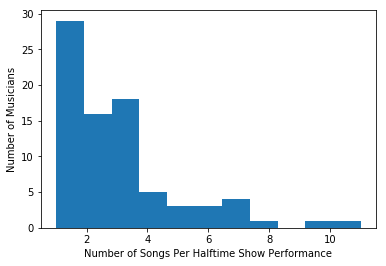

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
70,30,Diana Ross,10.0
10,49,Katy Perry,8.0
2,51,Lady Gaga,7.0
90,23,Elvis Presto,7.0
33,41,Prince,7.0
16,47,Beyoncé,7.0
14,48,Bruno Mars,6.0
3,50,Coldplay,6.0
25,45,The Black Eyed Peas,6.0


In [0]:
# Filter out most marching bands
no_bands = halftime_musicians[~halftime_musicians.musician.str.contains('Marching')]
no_bands = no_bands[~no_bands.musician.str.contains('Spirit')]

# Plot a histogram of number of songs per performance
most_songs = int(max(no_bands['num_songs'].values))
plt.hist(no_bands.num_songs.dropna(), bins=most_songs)
plt.xlabel('Number of Songs Per Halftime Show Performance')
plt.ylabel('Number of Musicians')
plt.show()

# Sort the non-band musicians by number of songs per appearance...
no_bands = no_bands.sort_values('num_songs', ascending=False)
# ...and display the top 15
display(no_bands)

## 10. Conclusion
<p>So most non-band musicians do 1-3 songs per halftime show. It's important to note that the duration of the halftime show is fixed (roughly 12 minutes) so songs per performance is more a measure of how many hit songs you have. JT went off in 2018, wow. 11 songs! Diana Ross comes in second with 10 in her medley in 1996.</p>
<p>In this notebook, we loaded, cleaned, then explored Super Bowl game, television, and halftime show data. We visualized the distributions of combined points, point differences, and halftime show performances using histograms. We used line plots to see how ad cost increases lagged behind viewership increases. And we discovered that blowouts do appear to lead to a drop in viewers.</p>
